Add comments to whole project

Source : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?datasetId=180&sortBy=voteCount


#Classification Algorithms
1. Logistic Regression
2. Support Vector Machines
3. Decision Trees
4. Random Forest 
5. K-Nearest Neighbors
6. Naive Bayes


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
filepath = '/content/drive/MyDrive/Learning journey and projects/Breast cancer detection/data.csv'
data = pd.read_csv(filepath)

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [ ]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

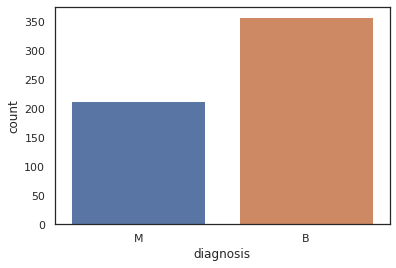

In [ ]:
sns.countplot(x='diagnosis',data=data)

In [ ]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# if the features are correlated with each other we can drop one of them)
# In order to compare two features deeper, lets use joint plot
# sns.jointplot(x.loc[:,'concavity_worst'], x.loc[:,'concave points_worst'], kind="reg", color="#ce1414")

In [ ]:
# # What about three or more feauture comparision ? For this purpose we can use pair grid plot. Also it seems very cool
# sns.set(style="white")
# df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
# g = sns.PairGrid(df, diag_sharey=False)
# g.map_lower(sns.kdeplot, cmap="Blues_d")
# g.map_upper(plt.scatter)
# g.map_diag(sns.kdeplot, lw=3)

#Feature selection
- univariate feature selection 
- recursive feature elimination (RFE)
- recursive feature elimination with cross validation (RFECV) and tree based feature selection.

In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features. http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
# select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
# print('Score list:', select_feature.scores_)
# print('Feature list:', x_train.columns)

In [ ]:
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
# feature selection using random forest classifier(using its feature importance attribute.)
# feature selection using PCA

# Learning/Explore:
- swarm plot and violin plot
- subplots of matplotlib
- f,ax = plt.subplots(figsize=(18, 18))
- feature engineering(also look at the kaggle certification)

In [ ]:
features_mean = list(data.columns[1:11])
features_se = list(data.columns[11:20])
features_worst = list(data.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [ ]:
# replace method
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

In [ ]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


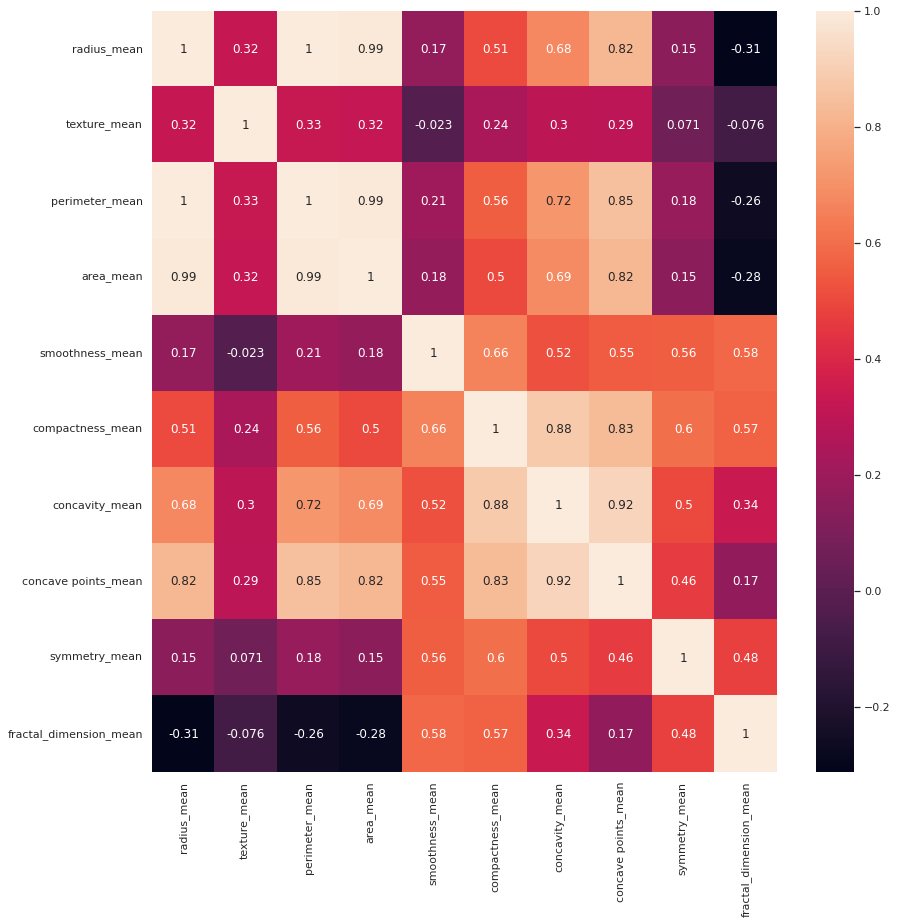

In [ ]:
corr = data[features_mean].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True)

In [ ]:
# why not fractal_dimesion_mean
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

In [ ]:
from sklearn.model_selection import train_test_split

#now split our data into train and test
train, test = train_test_split(data, test_size = 0.3)
train.shape,test.shape

((398, 31), (171, 31))

In [ ]:
# For mean columns

train_X = train[prediction_var]# taking the training data input 
train_y=train.diagnosis# This is output of our training data
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test.diagnosis   #output value of test dat

#Modelling

## Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)

In [ ]:
rf_clf.fit(train_X,train_y)# now fit our model for traiing data

RandomForestClassifier()

In [ ]:
prediction=rf_clf.predict(test_X)

In [ ]:
featimp = pd.Series(rf_clf.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp) 
# this is the property of Random Forest classifier that it provide us the importance of the features used.

perimeter_mean      0.477980
compactness_mean    0.217579
texture_mean        0.152348
smoothness_mean     0.088030
symmetry_mean       0.064062
dtype: float64


In [ ]:
prediction

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
from sklearn import metrics
metrics.accuracy_score(prediction,test_y)

0.9590643274853801

In [ ]:
def train_and_predict(clf,train_X,train_y,test_X,test_y):
  clf.fit(train_X,train_y)
  pred = clf.predict(test_X)
  score = metrics.accuracy_score(pred,test_y)
  return score

In [ ]:
from sklearn import svm
svc_clf = svm.SVC()
train_and_predict(svc_clf,train_X,train_y,test_X,test_y)

0.935672514619883

In [ ]:
prediction_var2 = features_mean # taking all features

train_X2= train[prediction_var2]
test_X2 = test[prediction_var2]

In [ ]:
rf_clf2 = RandomForestClassifier(n_estimators=100)
train_and_predict(rf_clf2,train_X2,train_y,test_X2,test_y)

0.9649122807017544

In [ ]:
svc_clf2 = svm.SVC()
train_and_predict(svc_clf2,train_X2,train_y,test_X2,test_y)

0.9239766081871345

##feature importance

In [ ]:
featimp = pd.Series(rf_clf2.feature_importances_, index=prediction_var2).sort_values(ascending=False)
print(featimp) 
# this is the property of Random Forest classifier that it provide us the importance of the features used.

concave points_mean       0.229023
concavity_mean            0.194658
area_mean                 0.159736
perimeter_mean            0.153676
radius_mean               0.084828
texture_mean              0.066737
compactness_mean          0.046575
smoothness_mean           0.024148
fractal_dimension_mean    0.020810
symmetry_mean             0.019811
dtype: float64


**now lets take only top 5 important features given by RandomForest classifier**

In [ ]:
prediction_var3=['concave points_mean','perimeter_mean' , 'concavity_mean' , 'radius_mean','area_mean']
train_X3 = train[prediction_var3]
test_X3 = test[prediction_var3]

In [ ]:
rf_clf3 = RandomForestClassifier(n_estimators=100)
train_and_predict(rf_clf3,train_X3,train_y,test_X3,test_y)

0.935672514619883

In [ ]:
svc_clf3 = svm.SVC()
train_and_predict(svc_clf3,train_X3,train_y,test_X3,test_y)

0.9239766081871345

In [ ]:
import copy
temp = copy.deepcopy(features_mean)
temp.append('diagnosis')s

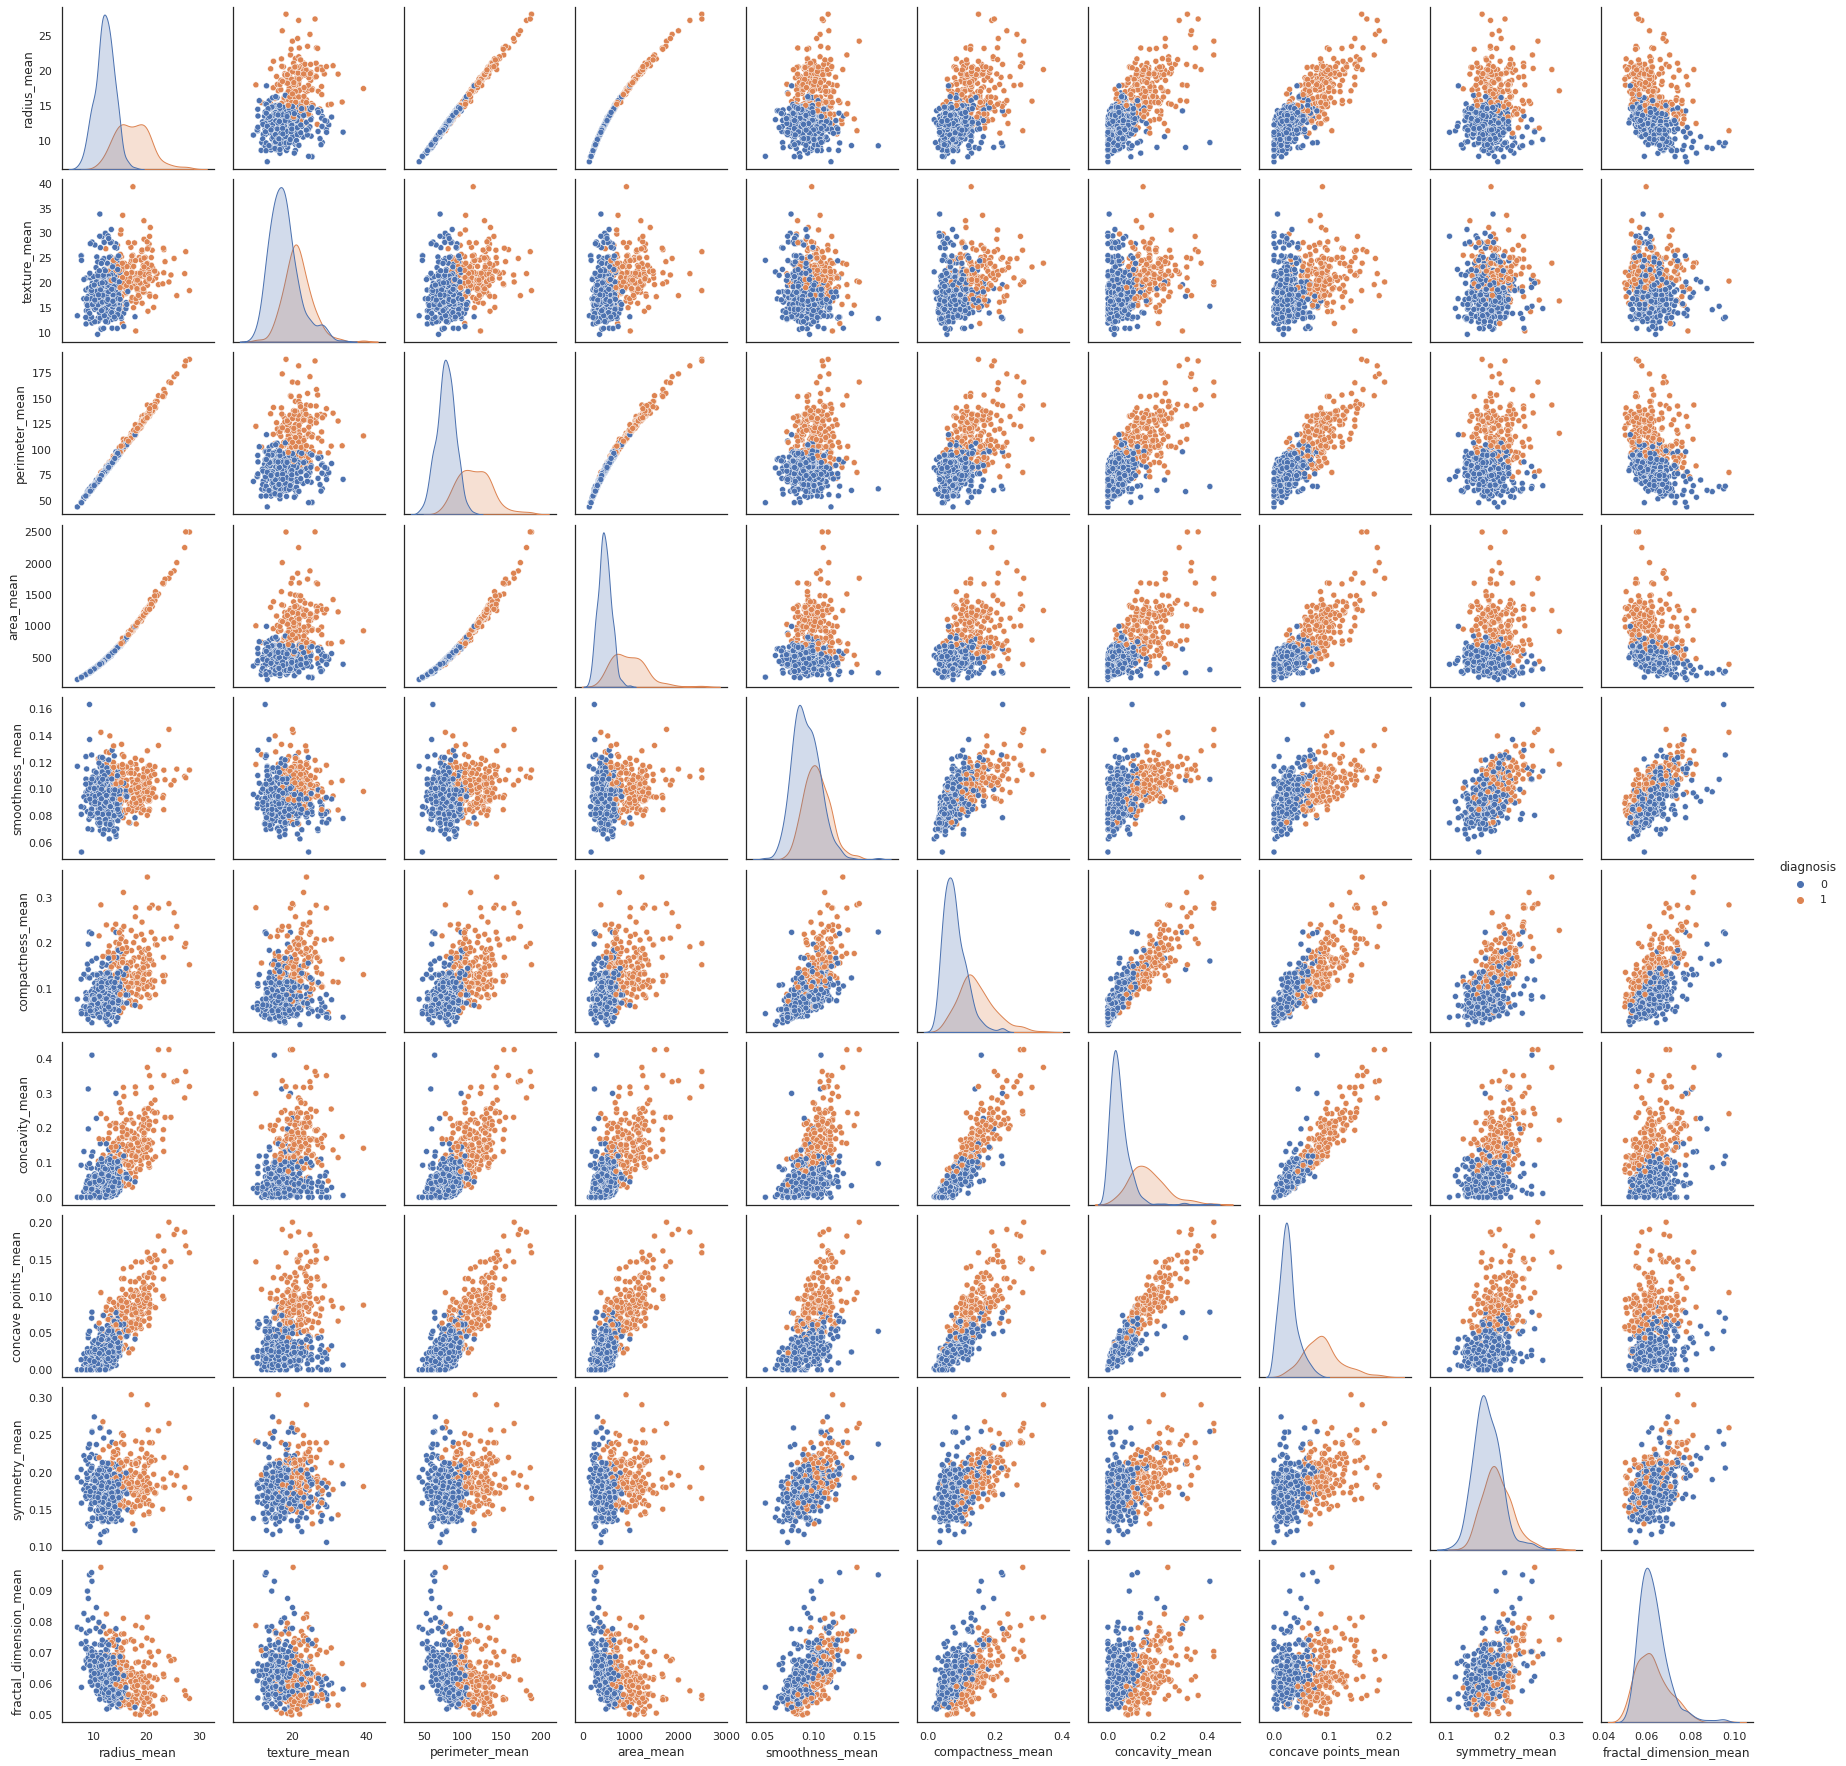

In [ ]:
sns.pairplot(data=data[temp], hue='diagnosis')
# # data['diagnosis']

In [ ]:
# k-fold cross validation and stratified k-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
def cross_validation(clf,x_train,y_train,cv):
  scores = cross_val_score(clf,x_train,y_train,cv=cv)
  return scores

# There are different methods of cross_validation
# 1. cross_val_score
# 2. cross_val_predict
# 3. cross_val_validate
# each have little difference between them

# Another way to perform cross validation is using the kfold and stratifiedkfold

#Saving a machine learning model

In [ ]:
# from sklearn.externals import joblib
# joblib.dump(model,'model.pkl') # to save the model
# my_model_loaded = joblib.load("model.pkl") # loading machine learning model back

#Modelling using neural networks